<a href="https://colab.research.google.com/github/Sandeept1986-web/python-first-tutorial-practise/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Build Pipeline: Preprocessing + Model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

# Train and Predict
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

print("Classification Report:\n", classification_report(y_test, predictions))

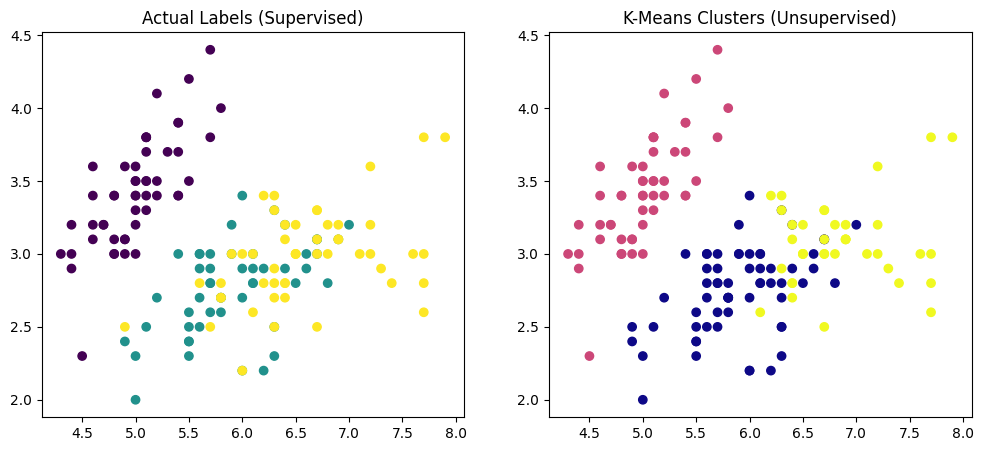

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

# 1. Supervised: Logistic Regression
clf = LogisticRegression(max_iter=200).fit(df, y)
supervised_preds = clf.predict(df)

# 2. Unsupervised: K-Means (Assuming 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(df)
unsupervised_labels = kmeans.labels_

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y, cmap='viridis')
ax1.set_title("Actual Labels (Supervised)")

ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], c=unsupervised_labels, cmap='plasma')
ax2.set_title("K-Means Clusters (Unsupervised)")

plt.show()



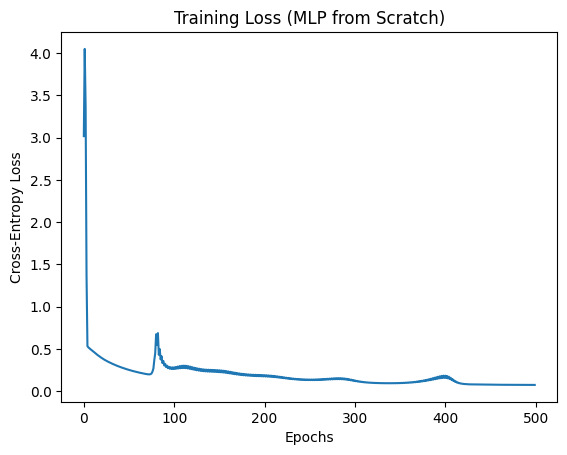

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def to_one_hot(y, num_classes):
    return np.eye(num_classes)[y]

class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim, lr=0.01):
        self.lr = lr
        # He Initialization
        self.W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2./input_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(2./hidden_dim)
        self.b2 = np.zeros((1, output_dim))

    def relu(self, x): return np.maximum(0, x)

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.probs = self.softmax(self.z2)
        return self.probs

    def backward(self, X, y_true):
        m = X.shape[0]
        # Backprop through Softmax/Cross-Entropy
        dz2 = self.probs - y_true
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        # Backprop through ReLU
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * (self.z1 > 0)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Update weights
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

# Training Setup
X = load_iris().data
y = to_one_hot(load_iris().target, 3)
model = MLP(input_dim=4, hidden_dim=8, output_dim=3, lr=0.1)
losses = []

for epoch in range(500):
    probs = model.forward(X)
    loss = -np.mean(np.sum(y * np.log(probs + 1e-8), axis=1))
    losses.append(loss)
    model.backward(X, y)

plt.plot(losses)
plt.title("Training Loss (MLP from Scratch)")
plt.xlabel("Epochs"); plt.ylabel("Cross-Entropy Loss")
plt.show()